In [8]:
!pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable


# Step 1:Loading The Libraries

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import category_encoders as ce
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

A decision tree classifier is a machine learning algorithm that creates a tree-like structure to make predictions. It splits the data based on features into different branches, with each branch representing a decision. The process continues recursively until it reaches a leaf node, where the final prediction is made

Here are some common areas where decision trees find `applications`:

Classification Problems: Decision trees are extensively used for classification tasks, where the goal is to categorize input data into predefined classes or categories. They are employed in areas such as:

Email spam detection
Medical diagnosis
Credit risk assessment
Customer churn prediction
Sentiment analysis
Image classification
Regression Problems: Decision trees can also be used for regression tasks, where the goal is to predict a continuous numerical value. They are utilized in areas such as:

Stock price prediction
Housing price estimation
Demand forecasting
Feature Selection: Decision trees can assist in identifying the most relevant features in a dataset. By analyzing the split decisions made during tree construction, one can prioritize features based on their importance in making accurate predictions.

Anomaly Detection: Decision trees can be used to detect anomalies or outliers in data by flagging data points that fall into rare or unexpected branches of the tree.

Ensemble Methods: Decision trees serve as fundamental building blocks for ensemble methods such as Random Forests and Gradient Boosting Machines. These ensemble methods combine multiple decision trees to improve predictive performance and robustness.

#### Category encoders

Category encoders, also known as categorical encoders, are a set of techniques used in machine learning to convert categorical variables into numerical representations that can be used as inputs to machine learning models.

Decision trees have several strengths and weaknesses in machine learning:

### Strengths:

1. **Interpretability**: Decision trees are easy to understand and interpret. The decision rules learned by the tree can be visualized, making it easy to explain to stakeholders and non-technical users.

2. **Handling Non-linear Relationships**: Decision trees can capture non-linear relationships between features and the target variable without requiring complex transformations or feature engineering.

3. **Handle Mixed Data Types**: Decision trees can handle both numerical and categorical data. They `don't require feature scaling or one-hot encoding, simplifying the preprocessing steps`.

4. **Implicit Feature Selection**: Decision trees perform feature selection implicitly by selecting the most informative features for splitting nodes, which can help in identifying important features in the dataset.

5. **Robustness to Outliers and Missing Values**: Decision trees are robust to outliers and missing values. They can handle noisy data without significantly affecting performance.

### Weaknesses:

1. **Overfitting**: Decision trees are prone to overfitting, especially when the tree grows too deep and captures noise in the training data. Techniques like pruning, limiting tree depth, or using ensemble methods are necessary to mitigate overfitting.

2. **High Variance**: Decision trees have high variance, meaning small changes in the training data can lead to significantly different trees. Ensemble methods like Random Forests or Gradient Boosting can reduce variance and improve generalization performance.

3. **Bias Towards Dominant Classes**: In classification problems with imbalanced class distributions, decision trees tend to bias towards the dominant classes, leading to poor performance on minority classes. Techniques like class weighting or resampling can address this issue.

4. **Instability**: Decision trees are `sensitive to small variations in the training data`, which can lead to different tree structures. This instability makes decision trees less reliable compared to some other algorithms.

5. **Limited Expressiveness**: While decision trees can capture complex relationships in the data, they may struggle with capturing more nuanced patterns compared to more advanced models like neural networks or gradient boosting machines.

In summary, decision trees are simple yet powerful models that offer interpretability and can handle various data types. However, they have limitations such as overfitting and high variance, which need to be addressed to achieve optimal performance in real-world applications.

## Step2 : Loading the libraries

In [12]:
import pickle

In [14]:
# Specify the path to your CSV file
csv_file_path = 'car_evaluation.csv'

In [16]:
# Import necessary libraries
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [18]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names #chajing the column names 

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [20]:
# Now you can work with the DataFrame as needed
print(df.head())

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    med  unacc
1  vhigh  vhigh     2       2    small   high  unacc
2  vhigh  vhigh     2       2      med    low  unacc
3  vhigh  vhigh     2       2      med    med  unacc
4  vhigh  vhigh     2       2      med   high  unacc


In [22]:
df.shape

(1727, 7)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [26]:
df.isnull().sum()
#We can see that there are no missing values in the dataset

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [28]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
for col in col_names:
  print(df[col].value_counts()) #to count the number of ech labels present in the column

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [50]:
df.isnull().sum()
#We can see that there are no missing values in the dataset

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [51]:
df['class'].value_counts()
#The class target variable is ordinal in nature.


class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [52]:
X = df.drop(['class'], axis=1)
y = df['class']#seperating it into target and train-test variab;es

## Step 3:Training and Testing the Data 

In [53]:
# Split the dataset into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state=42)

In [54]:
# checking the shape of train and test
X_train.shape,X_test.shape

((1157, 6), (570, 6))

In [55]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [56]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low


## Step4: Encoding

n decision tree-based machine learning algorithms, encoding categorical variables (including ordinal encoding) is necessary because these algorithms typically work with numerical data. Decision trees make decisions by splitting the data based on feature values, and they require numeric input features to determine these splits.

Here's why encoding is necessary in decision trees:

Numeric Input Requirement: Decision trees split the data based on feature values. If you have categorical features, such as "Low," "Medium," and "High," decision trees cannot directly split the data on these categories. Therefore, categorical variables need to be encoded into numerical values so that the decision tree algorithm can work with them.

Handling Categorical Variables: Decision tree algorithms usually don't handle categorical variables directly. Instead, they split the data based on numerical thresholds. By encoding categorical variables into numerical representations, decision trees can effectively make splits based on these encoded values.

Maintaining Ordinal Relationship: If the categorical variable has an ordinal relationship (i.e., there is a meaningful order between categories), ordinal encoding preserves this relationship by assigning numerical values accordingly. This ensures that the decision tree algorithm considers the ordinal nature of the variable during the splitting process.

Compatibility with Libraries: Most machine learning libraries, including popular ones like scikit-learn, expect numerical input data. Therefore, encoding categorical variables into numerical representations is a necessary preprocessing step to ensure compatibility with these libraries.

In [57]:
# encoding process in categorical columns
import category_encoders as ce

In [58]:
# encode categorical variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

OrdinalEncoder is a tool commonly used in machine learning for transforming categorical features into numeric representations.

In [59]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2
155,1,2,2,2,1,1
1043,3,2,3,2,2,1


In [60]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,1,3,1
932,3,1,3,3,3,1
628,2,2,1,1,3,3
1497,4,2,1,3,1,2
1262,3,4,3,2,1,1


In [61]:
# Create a Decision Tree Classifier with the "entropy" criterion
clf = DecisionTreeClassifier(criterion="entropy")

In decision tree classifiers, the "criterion" parameter is used to measure the quality of a split. The criterion determines how the decision tree algorithm decides to split the data at each node during the construction of the tree. Different criteria measure the quality of splits in different ways. The most common criteria used in decision tree classifiers are:

`Gini impurity (default):` Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it were randomly labeled according to the distribution of labels in the subset. It ranges from 0 (perfectly pure node, all elements belong to the same class) to 0.5 (maximum impurity, equal distribution of classes).

`Entropy:` Entropy is a measure of disorder or randomness in a system. In decision trees, entropy measures the impurity of a node's labels. It ranges from 0 (perfectly ordered, all elements belong to the same class) to 1 (maximum entropy, equal distribution of classes).

`Misclassification error:` Also known as classification error or zero-one loss, this criterion measures the ratio of the number of misclassified instances to the total number of instances in a node. It ranges from 0 to 1, where 0 indicates no misclassification and 1 indicates all instances are misclassified.

Different criteria may lead to different decision trees and ultimately different models. The choice of criterion often depends on the specific characteristics of the dataset and the problem at hand. In practice, the default criterion used in many implementations, including scikit-learn's DecisionTreeClassifier, is Gini impurity. However, it's always a good idea to experiment with different criteria to find the one that works best for your dataset and problem.

Each criterion in decision tree classifiers measures the impurity or purity of a node in the tree. Here's what each value represents for the commonly used criteria:

1. **Gini impurity**:
   - Value ranges from 0 to 1.
   - A Gini impurity of 0 indicates that the node is pure, meaning all the samples in that node belong to the same class.
   - A Gini impurity of 1 indicates maximum impurity, meaning an equal distribution of samples across all classes in the node.

2. **Entropy**:
   - Value ranges from 0 to 1.
   - Entropy of 0 indicates maximum purity, meaning all samples in the node belong to the same class.
   - Entropy of 1 indicates maximum impurity, meaning an equal distribution of samples across all classes in the node.

3. **Misclassification error**:
   - Value ranges from 0 to 1.
   - A misclassification error of 0 indicates maximum purity, meaning all samples in the node belong to the same class.
   - A misclassification error of 1 indicates maximum impurity, meaning an equal distribution of samples across all classes in the node.

In summary, lower values of these criteria indicate a purer node with predominantly one class, while higher values indicate more impurity with a more even distribution of classes. The decision tree algorithm aims to minimize these impurity measures by making splits that result in nodes with predominantly one class, leading to a more accurate classification.

In [62]:
# Train the classifier on the training set
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

Certainly! Let's break it down:

1. **`fit()`**:
   - Think of `fit()` as a step where a transformer (like a scaler or encoder) learns from your data. It's like studying the data to understand its characteristics without changing it.
   - You use `fit()` when you want to prepare a transformer to make changes to your data later based on what it learned.

2. **`fit_transform()`**:
   - `fit_transform()` is like a two-in-one action. It first learns from your data (like `fit()`), and then immediately applies the changes to the data (like `transform()`).
   - You use `fit_transform()` when you want to both learn from your data and make changes to it in one go.

In simple terms:
- Use `fit()` when you want to learn from your data without changing it right away.
- Use `fit_transform()` when you want to learn from your data and change it at the same time.

Imagine you're learning how to bake a cake:
- **`fit()`** is like reading the recipe and understanding it.
- **`fit_transform()`** is like reading the recipe, understanding it, and immediately starting to bake the cake following the instructions.

In [63]:
# Make predictions on the testing set
y_pred = clf.predict(X_test)

In [64]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9702


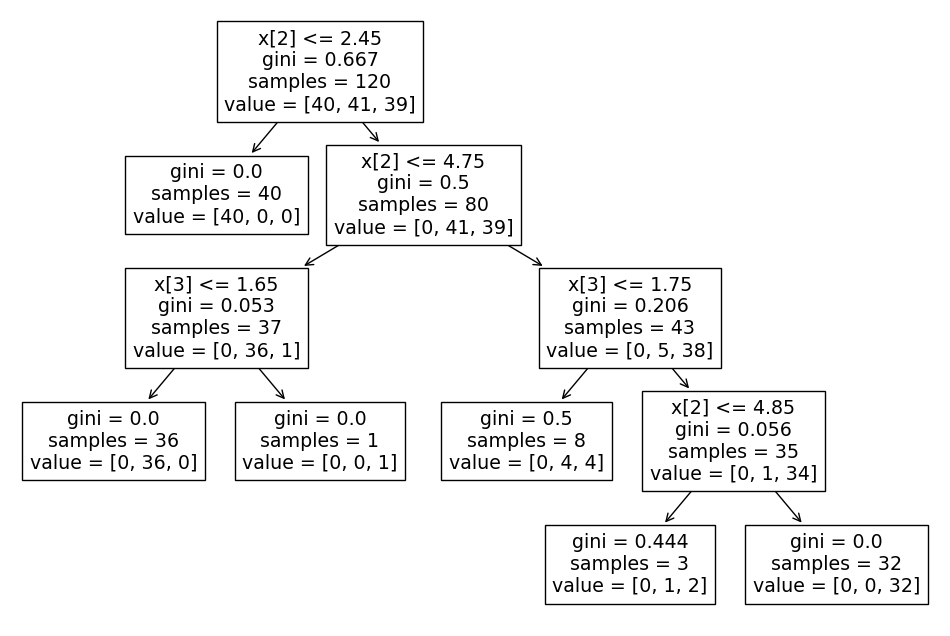

In [71]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf.fit(X_train, y_train))
plt.show()


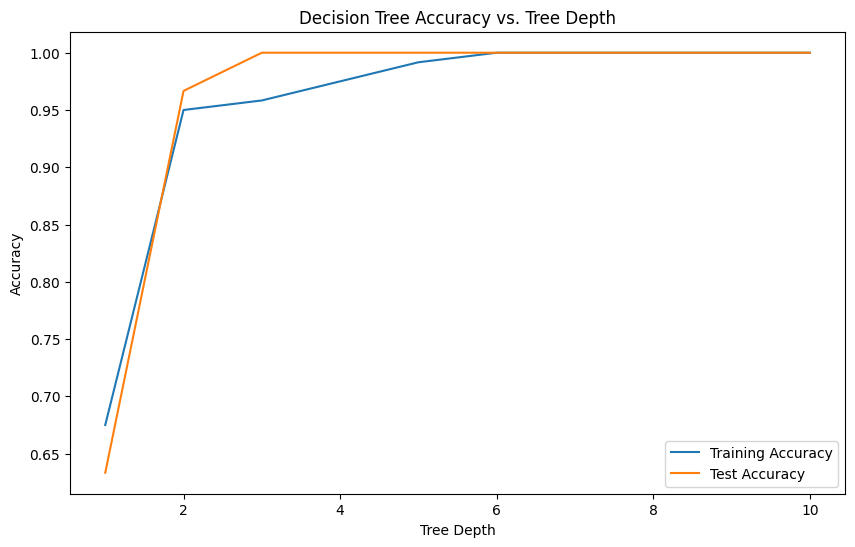

In [66]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize lists to store accuracy values
train_accuracy = []
test_accuracy = []

# Test different tree depths
depths = np.arange(1, 11)
for depth in depths:
    # Create a Decision Tree Classifier with the specified depth
    clf = DecisionTreeClassifier(criterion="gini", max_depth=depth)

    # Train the classifier on the training set
    clf.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Calculate and store accuracy values
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Plot the accuracy values
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracy, label="Training Accuracy")
plt.plot(depths, test_accuracy, label="Test Accuracy")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Accuracy vs. Tree Depth")
plt.legend()
plt.show()


[Text(0.3076923076923077, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]')

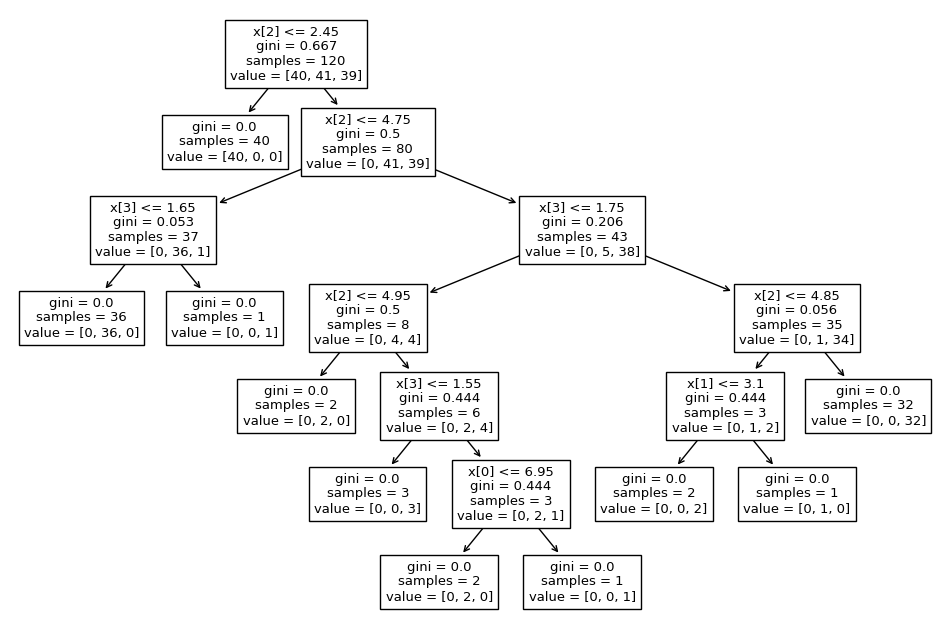

In [67]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf.fit(X_train, y_train))

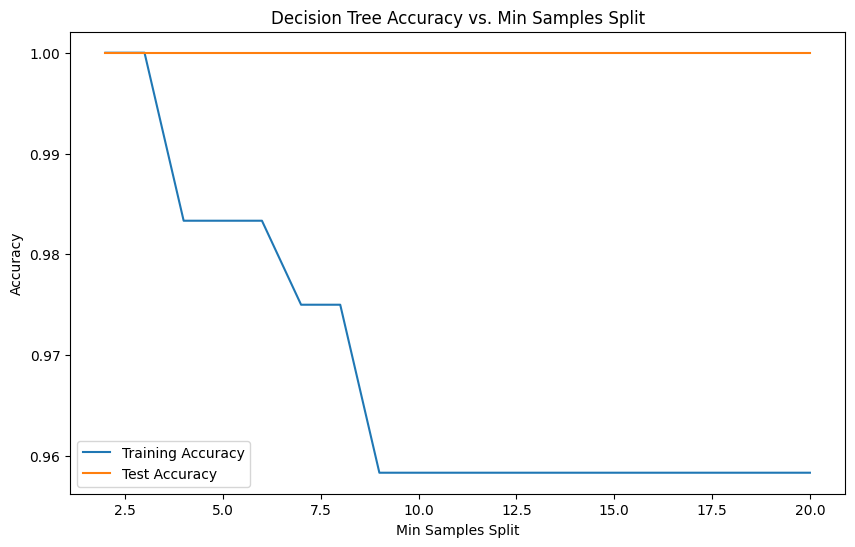

In [68]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize lists to store accuracy values
train_accuracy = []
test_accuracy = []

# Test different values for min_samples_split
min_samples_splits = np.arange(2, 21)
for min_samples_split in min_samples_splits:
    # Create a Decision Tree Classifier with the specified min_samples_split
    clf = DecisionTreeClassifier(criterion="gini", min_samples_split=min_samples_split)

    # Train the classifier on the training set
    clf.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Calculate and store accuracy values
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Plot the accuracy values
plt.figure(figsize=(10, 6))
plt.plot(min_samples_splits, train_accuracy, label="Training Accuracy")
plt.plot(min_samples_splits, test_accuracy, label="Test Accuracy")
plt.xlabel("Min Samples Split")
plt.ylabel("Accuracy")
plt.title("Decision Tree Accuracy vs. Min Samples Split")
plt.legend()
plt.show()


In [69]:
dtc_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split= 2, random_state=0, min_samples_leaf= 1)

# fit the model
dtc_gini.fit(X_train, y_train)
y_pred_gini = dtc_gini.predict(X_test)

In [70]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(dtc_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(dtc_gini.score(X_test, y_test)))

Training set score: 0.9583
Test set score: 1.0000
